1. cleaning irrelevant data
2. encoding data
3. dealing with empty values
4. dealing with duplicates
5. dealing with outlier
6. feature scaling

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data=pd.read_csv(r"C:\Users\sairam\Downloads\food-consumption.csv")
data.tail()

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
11,Denmark,96,17,92,35.0,66.0,32,17,11,51,...,81,72,50,64,11,92,91,30,11.0,34
12,Norway,92,17,83,13.0,62.0,51,4,17,30,...,61,72,34,51,11,63,94,28,2.0,62
13,Finland,98,12,84,20.0,64.0,27,10,8,18,...,50,57,22,37,15,96,94,17,NaN,64
14,Spain,70,40,40,NaN,62.0,43,2,14,23,...,59,77,30,38,86,44,51,91,16.0,13
15,Ireland,30,52,99,11.0,80.0,75,18,2,5,...,57,52,46,89,5,97,25,31,3.0,9


# 1. cleaning irrelevant data

this part involves the removal of data that are not required for the task. For example, patient ID and phone number in disease classification task. It is better to drop those columns. In our example, the country column is irrelevant and can be removed. 
This is done by data.drop(['Column name'],axis=1)

In [8]:
data=data.drop(['Country'],axis=1)
data.head()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26
1,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18
2,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3
3,96,62,98,32.0,62.0,67,43,7,14,14,83,89,61,81,15,31,97,13,53.0,15
4,94,38,48,11.0,74.0,37,23,9,13,12,76,76,42,57,29,84,80,83,20.0,5


# 2. Encoding of data
this includes the conversion of string, bool and other datatypes to int and float. Assigning numbers to class values in target and converting yes/no to binary are some examples of data encoding. There are two types of encoding:-

Label encoding- use this when there are only two classes
One Hot encoding- use this when there are more than two classes

use data['column name'].unique() to find the classes

https://towardsdatascience.com/how-to-encode-categorical-columns-using-python-9af10b36f049

**Label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
marry_encoder = LabelEncoder()
marry_encoder.fit_transform(df_categorical['ever_married'])

**One hot encoding**

In [14]:
df_categorical_encoded = pd.get_dummies(data)
df_categorical_encoded.head()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,...,Country_Germany,Country_Holland,Country_Ireland,Country_Italy,Country_Luxembourg,Country_Norway,Country_Portugal,Country_Spain,Country_Sweden,Country_Switzerland
0,90,49,88,19.0,57.0,51,19,21,27,21,...,1,0,0,0,0,0,0,0,0,0
1,82,10,60,2.0,55.0,41,3,2,4,2,...,0,0,0,1,0,0,0,0,0,0
2,88,42,63,4.0,76.0,53,11,23,11,5,...,0,0,0,0,0,0,0,0,0,0
3,96,62,98,32.0,62.0,67,43,7,14,14,...,0,1,0,0,0,0,0,0,0,0
4,94,38,48,11.0,74.0,37,23,9,13,12,...,0,0,0,0,0,0,0,0,0,0


# 3. dealing with empty cells (NaN values)

## diagnosing the empty cells

**df.info()** 
gives information about the data, including the non-null count. If the count is less than number of rows, then the rows contain null values
**df.isnull().sum()**
gives the columns that contain null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         16 non-null     object 
 1   Real coffee     16 non-null     int64  
 2   Instant coffee  16 non-null     int64  
 3   Tea             16 non-null     int64  
 4   Sweetener       15 non-null     float64
 5   Biscuits        15 non-null     float64
 6   Powder soup     16 non-null     int64  
 7   Tin soup        16 non-null     int64  
 8   Potatoes        16 non-null     int64  
 9   Frozen fish     16 non-null     int64  
 10  Frozen veggies  16 non-null     int64  
 11  Apples          16 non-null     int64  
 12  Oranges         16 non-null     int64  
 13  Tinned fruit    16 non-null     int64  
 14  Jam             16 non-null     int64  
 15  Garlic          16 non-null     int64  
 16  Butter          16 non-null     int64  
 17  Margarine       16 non-null     int64

In [67]:
data.isnull().sum()

Country           0
Real coffee       0
Instant coffee    0
Tea               0
Sweetener         1
Biscuits          1
Powder soup       0
Tin soup          0
Potatoes          0
Frozen fish       0
Frozen veggies    0
Apples            0
Oranges           0
Tinned fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive oil         0
Yoghurt           1
Crisp bread       0
dtype: int64

# treatment of empty cells 
1.dropping 
2.filling
3.replacing
4.interpolation
5.ML based prediction

**dropping of rows that contain empty values**
dropna()- this method drops data with null values
axis=0- drops the rows with null
axis=1- drops the columns with null
(least recommended method, use when in hurry and for very huge datasets)

In [17]:
data.dropna(inplace=False)

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


In [18]:
data.dropna(axis=1,inplace=False)

,Country,Real coffee,Instant coffee,Tea,Sweetener,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Crisp bread
0,Germany,90,49,88,19.0,51,19,21,27,21,81,75,44,71,22,91,85,74,26
1,Italy,82,10,60,2.0,41,3,2,4,2,67,71,9,46,80,66,24,94,18
2,France,88,42,63,4.0,53,11,23,11,5,87,84,40,45,88,94,47,36,3
3,Holland,96,62,98,32.0,67,43,7,14,14,83,89,61,81,15,31,97,13,15
4,Belgium,94,38,48,11.0,37,23,9,13,12,76,76,42,57,29,84,80,83,5
5,Luxembourg,97,61,86,28.0,73,12,7,26,23,85,94,83,20,91,94,94,84,24
6,England,27,86,99,22.0,55,76,17,20,24,76,68,89,91,11,95,94,57,28
7,Portugal,72,26,77,2.0,34,1,5,20,3,22,51,8,16,89,65,78,92,9
8,Austria,55,31,61,15.0,33,1,5,15,11,49,42,14,41,51,51,72,28,11
9,Switzerland,73,72,85,25.0,69,10,17,19,15,79,70,46,61,64,82,48,61,30


**filling the values**
fillna()- this method can be used to fill the null values
(we can apply this for all rows for specific row)
what values can we fill?
1. fill all/specific rows with constant value- (based on domain knowledge)
2. fill all/specific rows based on other data
  2a. fill with previous values- fillna(method='bfill')
  2b. fill with next values- fillna(method='ffill')
3. fill all/specific rows based on stats
  3a. mean
  3b. median
  3c. kurtosis

In [22]:
data.fillna(0,inplace=True)
data.isnull().sum()

Country           0
Real coffee       0
Instant coffee    0
Tea               0
Sweetener         0
Biscuits          0
Powder soup       0
Tin soup          0
Potatoes          0
Frozen fish       0
Frozen veggies    0
Apples            0
Oranges           0
Tinned fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive oil         0
Yoghurt           0
Crisp bread       0
dtype: int64

In [23]:
data['Sweetener']=data['Sweetener'].fillna(method='bfill')
data.isnull().sum()

Country           0
Real coffee       0
Instant coffee    0
Tea               0
Sweetener         0
Biscuits          0
Powder soup       0
Tin soup          0
Potatoes          0
Frozen fish       0
Frozen veggies    0
Apples            0
Oranges           0
Tinned fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive oil         0
Yoghurt           0
Crisp bread       0
dtype: int64

In [24]:
a=data['Sweetener'].mean()
data['Sweetener']=data['Sweetener'].fillna(a)
data.isnull().sum()

Country           0
Real coffee       0
Instant coffee    0
Tea               0
Sweetener         0
Biscuits          0
Powder soup       0
Tin soup          0
Potatoes          0
Frozen fish       0
Frozen veggies    0
Apples            0
Oranges           0
Tinned fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive oil         0
Yoghurt           0
Crisp bread       0
dtype: int64

In [25]:
me=data['Biscuits'].median()
data['Biscuits']=data['Biscuits'].fillna(me)
mo=data['Yoghurt'].kurtosis()
data['Yoghurt']=data['Yoghurt'].fillna(mo)
data.isnull().sum()

Country           0
Real coffee       0
Instant coffee    0
Tea               0
Sweetener         0
Biscuits          0
Powder soup       0
Tin soup          0
Potatoes          0
Frozen fish       0
Frozen veggies    0
Apples            0
Oranges           0
Tinned fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive oil         0
Yoghurt           0
Crisp bread       0
dtype: int64

**replacing**
replace all the NaN values with a specified value

In [37]:
data=data.replace(to_replace = np.nan, value = -1)
data.isnull().sum()


Country           0
Real coffee       0
Instant coffee    0
Tea               0
Sweetener         0
Biscuits          0
Powder soup       0
Tin soup          0
Potatoes          0
Frozen fish       0
Frozen veggies    0
Apples            0
Oranges           0
Tinned fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive oil         0
Yoghurt           0
Crisp bread       0
dtype: int64

**interpolate** 
estimation of unknown values through known values- (the unknown values fill fall in the range of known values)
'linear'-default
'akima'
'barycentric'
'cubic'
'cubispline'
'from_derivates'
'index'
'krogh'
'nearest'
'pad'
'pchip'
'piecewise_polynomial'
'polynomial'
'quadric'
'slinear'
'spline'
'time'
'zero'
'bfill'
'pad'
'ffill'

In [76]:
data=data.interpolate(method='cubic',inplace=False)
data.isnull().sum()

Real coffee       0
Instant coffee    0
Tea               0
Sweetener         0
Biscuits          0
Powder soup       0
Tin soup          0
Potatoes          0
Frozen fish       0
Frozen veggies    0
Apples            0
Oranges           0
Tinned fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive oil         0
Yoghurt           0
Crisp bread       0
dtype: int64

**ML model based prediction**
In this method, we deploy machine learning algorithms to predict the value for the missing entires. these models are trained on the known values and used to predict the unknown values.
This method works only if one column has null values and the other columns are non-null or else it will throw error in training.

In [72]:
data=data.drop(['Country'],axis=1)
data.head()
data['Biscuits']=data['Biscuits'].fillna(method='bfill')
data['Yoghurt']=data['Yoghurt'].interpolate()
data.isnull().sum()

Real coffee       0
Instant coffee    0
Tea               0
Sweetener         1
Biscuits          0
Powder soup       0
Tin soup          0
Potatoes          0
Frozen fish       0
Frozen veggies    0
Apples            0
Oranges           0
Tinned fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive oil         0
Yoghurt           0
Crisp bread       0
dtype: int64

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
data.head()
testdf = data[data['Sweetener'].isnull()==True]
traindf = data[data['Sweetener'].isnull()==False]
y = traindf['Sweetener']
traindf.drop("Sweetener",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("Sweetener",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Sweetener']= pred

C:\Users\sairam\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\sairam\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-75-0289a47963f9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['Sweetener']= pre

dropping of rows/columns is the least preffered operation.
general practice involves filling unknown values with statistical parameters or with previous/next values to follow data trend.
some cases include the operation of interpolation.
ML prediction works well only if 1 column is null and rest are non-null and also for large datasets only.

# 4. dealing with duplicate values
it includes the detection of rows that are duplicates and removing them

In [9]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool

In [10]:
data.drop_duplicates()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26
1,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18
2,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3
3,96,62,98,32.0,62.0,67,43,7,14,14,83,89,61,81,15,31,97,13,53.0,15
4,94,38,48,11.0,74.0,37,23,9,13,12,76,76,42,57,29,84,80,83,20.0,5
5,97,61,86,28.0,79.0,73,12,7,26,23,85,94,83,20,91,94,94,84,31.0,24
6,27,86,99,22.0,91.0,55,76,17,20,24,76,68,89,91,11,95,94,57,11.0,28
7,72,26,77,2.0,22.0,34,1,5,20,3,22,51,8,16,89,65,78,92,6.0,9
8,55,31,61,15.0,29.0,33,1,5,15,11,49,42,14,41,51,51,72,28,13.0,11
9,73,72,85,25.0,31.0,69,10,17,19,15,79,70,46,61,64,82,48,61,48.0,30


# 5. Dealing with outliers
outliers are nothing but data that are out of range or do not fit into the distribution of general data.
we need to detect the outliers and eliminate them. 

**Standard methods to detect outliers**
1. Box plot
2. Scatter plot
3. IQR (Inter Quartile Range)
4. Z-score

**Box plot**
useful for single features. outliers are values that lie beyond the box. using np.where() we can find the data that act as outliers
np.where(data['Column name']>threshold) where the threshold is determined by the box plot. Outliers are marked by dots.

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([], dtype=int64),)

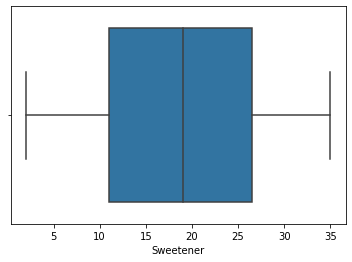

In [18]:
import seaborn as sns
sns.boxplot(data['Sweetener'])
np.where(data['Sweetener']>35)

**Scatterplot**
This is used when two features are taken into consideration. The output is a plot of distribution of one feature with respect to another. The outliers and the threshold range can be visually inspected.

(array([ 1,  2,  4,  7,  8, 14], dtype=int64),)


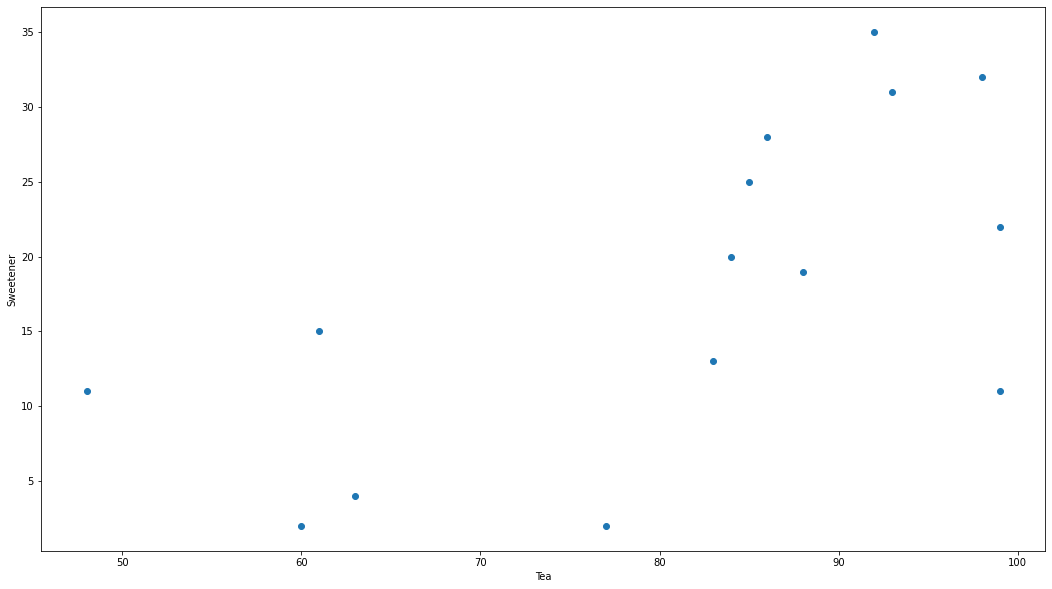

In [24]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(data['Tea'], data['Sweetener'])
ax.set_xlabel('Tea')
ax.set_ylabel('Sweetener')
print(np.where((data['Tea']<80)))

**Z-Score**
This parameter measures the distance of the datapoint from that of the mean with respect to standard deviation. It is proved that 99.7% of data lies within the third standard deviation from the mean (Z=3). So values greater than 3 are outliers.

In [30]:
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(data['Potatoes']))
np.where(z>3)

(array([], dtype=int64),)

**IQR**
Inter Quartile Range is another great way to identify outliers. It is the difference between 75% and 25% of data. From the IQR, the upper and lower bounds are identified. The upper bound is 1.5 times the IQR added with 75% (Q3) and the lower bound is 1.5 times the IQR subtracted from 25% (Q1). Datapoints less than lower and higher than upper are considered as outliers.

In [33]:
Q1 = np.percentile(data['Sweetener'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Sweetener'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = data['Sweetener'] >= (Q3+1.5*IQR)
 
#print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = data['Sweetener'] <= (Q1-1.5*IQR)
#print("Lower bound:", lower)
print(np.where(lower))
data=data.drop(upper[0], inplace = True)
data=data.drop(lower[0], inplace = True)

(array([], dtype=int64),)
(array([], dtype=int64),)


<ipython-input-33-7451a75f17b2>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['Sweetener'], 25,
<ipython-input-33-7451a75f17b2>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['Sweetener'], 75,


# 6. Standardisation and Normalization

**General notes**

standardisation is the process of converting the data such that their mean becomes 0 and s.d becomes 1
normalisation is the process of scaling the data to the range of 0 to 1 using min max values 
standardisation is good for gradient descent based algorithms, normalisation is good for distance based algorithms and none is useful for decision trees
normalization- done using minmaxscaler
standardisation- done using standardscaler

**normalization**

In [82]:
for column in data.columns:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min()) 
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.887324,0.513158,0.813559,0.513430,0.507246,0.500000,0.240000,0.513514,0.46,0.441860,0.907692,0.634615,0.444444,0.733333,0.197674,0.909091,0.835616,0.753086,0.509091,0.255556
1,0.774648,0.000000,0.338983,0.000000,0.478261,0.291667,0.026667,0.000000,0.00,0.000000,0.692308,0.557692,0.012346,0.400000,0.872093,0.530303,0.000000,1.000000,0.054545,0.166667
2,0.859155,0.421053,0.389831,0.060404,0.782609,0.541667,0.133333,0.567568,0.14,0.069767,1.000000,0.807692,0.395062,0.386667,0.965116,0.954545,0.315068,0.283951,1.000000,0.000000
3,0.971831,0.684211,0.983051,0.906053,0.579710,0.833333,0.560000,0.135135,0.20,0.279070,0.938462,0.903846,0.654321,0.866667,0.116279,0.000000,1.000000,0.000000,0.927273,0.133333
4,0.943662,0.368421,0.135593,0.271816,0.753623,0.208333,0.293333,0.189189,0.18,0.232558,0.830769,0.653846,0.419753,0.546667,0.279070,0.803030,0.767123,0.864198,0.327273,0.022222
5,0.985915,0.671053,0.779661,0.785246,0.826087,0.958333,0.146667,0.135135,0.44,0.488372,0.969231,1.000000,0.925926,0.053333,1.000000,0.954545,0.958904,0.876543,0.527273,0.233333
6,0.000000,1.000000,1.000000,0.604036,1.000000,0.583333,1.000000,0.405405,0.32,0.511628,0.830769,0.500000,1.000000,1.000000,0.069767,0.969697,0.958904,0.543210,0.163636,0.277778
7,0.633803,0.210526,0.627119,0.000000,0.000000,0.145833,0.000000,0.081081,0.32,0.023256,0.000000,0.173077,0.000000,0.000000,0.976744,0.515152,0.739726,0.975309,0.072727,0.066667
8,0.394366,0.276316,0.355932,0.392623,0.101449,0.125000,0.000000,0.081081,0.22,0.209302,0.415385,0.000000,0.074074,0.333333,0.534884,0.303030,0.657534,0.185185,0.200000,0.088889
9,0.647887,0.815789,0.762712,0.694641,0.130435,0.875000,0.120000,0.405405,0.30,0.302326,0.876923,0.538462,0.469136,0.600000,0.686047,0.772727,0.328767,0.592593,0.836364,0.300000


**standardisation**

In [83]:
data.describe()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,78.562500,39.250000,78.500000,19.069414,61.000000,49.000000,18.312500,12.750000,21.875000,15.87500,66.812500,70.500000,41.937500,55.187500,42.312500,75.812500,69.125000,54.187500,19.812500,27.750000
std,23.145824,23.147354,18.540047,11.368012,19.214578,15.427249,20.178268,9.574271,13.980343,12.78997,17.581122,14.033294,23.256451,22.592679,34.677022,20.910026,26.849891,28.842604,18.562395,25.026652
min,27.000000,10.000000,40.000000,2.000000,22.000000,27.000000,1.000000,2.000000,4.000000,2.00000,22.000000,42.000000,8.000000,16.000000,5.000000,31.000000,24.000000,13.000000,2.000000,3.000000
25%,71.500000,17.000000,62.500000,11.000000,56.500000,36.250000,3.750000,6.500000,13.750000,6.50000,56.750000,65.250000,28.000000,40.250000,11.000000,64.500000,47.750000,29.500000,5.750000,10.500000
50%,89.000000,39.000000,84.500000,19.500000,63.000000,47.000000,11.500000,10.000000,19.500000,13.00000,71.500000,72.000000,43.000000,54.000000,25.500000,83.000000,79.000000,52.500000,12.000000,21.000000
75%,96.000000,54.250000,92.250000,28.750000,74.500000,58.000000,20.000000,17.000000,26.250000,21.50000,81.000000,77.250000,50.750000,72.000000,81.500000,94.000000,94.000000,83.250000,30.250000,31.000000
max,98.000000,86.000000,99.000000,35.110630,91.000000,75.000000,76.000000,39.000000,54.000000,45.00000,87.000000,94.000000,89.000000,91.000000,91.000000,97.000000,97.000000,94.000000,57.000000,93.000000


In [86]:
data.mean().mean()

45.881595718988265

Real coffee, Tea, Sweetener, Biscuits, Tin soup, Potatoes, Frozen fish, Frozen veggies, Apples, Oranges, Butter, Mrgarine, Yoghurt, Crisp bread

In [87]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
data_stand = data.copy()

# numerical features
num_cols = ['Real coffee','Tea','Sweetener','Biscuits','Tin soup','Potatoes','Frozen fish','Frozen veggies','Apples','Oranges','Butter','Margarine','Yoghurt','Crisp bread']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(data_stand[[i]])
    
    # transform the training data column
    data_stand[i] = scale.transform(data_stand[[i]])

In [88]:
data_stand.describe()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
count,16.000000,16.000000,16.000000,1.600000e+01,1.600000e+01,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,16.000000,16.000000,16.000000,1.600000e+01,1.600000e+01,16.000000,1.600000e+01,1.600000e+01
mean,0.000000,39.250000,0.000000,-3.469447e-17,4.163336e-17,49.000000,-8.456777e-18,1.387779e-17,-4.163336e-17,1.387779e-17,6.938894e-18,4.163336e-17,41.937500,55.187500,42.312500,-1.387779e-17,1.387779e-17,54.187500,-2.081668e-17,2.081668e-17
std,1.032796,23.147354,1.032796,1.032796e+00,1.032796e+00,15.427249,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,23.256451,22.592679,34.677022,1.032796e+00,1.032796e+00,28.842604,1.032796e+00,1.032796e+00
min,-2.300783,10.000000,-2.144689,-1.550774e+00,-2.096274e+00,27.000000,-8.861154e-01,-1.159624e+00,-1.320513e+00,-1.120412e+00,-2.632491e+00,-2.097489e+00,8.000000,16.000000,5.000000,-2.213395e+00,-1.735757e+00,13.000000,-9.910721e-01,-1.021379e+00
25%,-0.315138,17.000000,-0.891299,-7.331146e-01,-2.418778e-01,36.250000,-7.453606e-01,-6.741999e-01,-6.002330e-01,-7.570353e-01,-5.911173e-01,-3.863795e-01,28.000000,40.250000,11.000000,-5.587511e-01,-8.222009e-01,29.500000,-7.824253e-01,-7.118700e-01
50%,0.465734,39.000000,0.334237,3.911915e-02,1.075012e-01,47.000000,-3.486880e-01,-2.966479e-01,-1.754527e-01,-2.321575e-01,2.753652e-01,1.103941e-01,43.000000,54.000000,25.500000,3.550076e-01,3.798472e-01,52.500000,-4.346807e-01,-2.785578e-01
75%,0.778083,54.250000,0.765960,8.794912e-01,7.256334e-01,58.000000,8.637225e-02,4.584559e-01,3.232024e-01,4.542212e-01,8.334387e-01,4.967736e-01,50.750000,72.000000,81.500000,8.983236e-01,9.568303e-01,83.250000,5.807335e-01,1.341204e-01
max,0.867326,86.000000,1.141977,1.457361e+00,1.612519e+00,75.000000,2.952652e+00,2.831639e+00,2.373229e+00,2.351856e+00,1.185906e+00,1.729508e+00,89.000000,91.000000,91.000000,1.046501e+00,1.072227e+00,94.000000,2.069080e+00,2.692726e+00
